# Project: Analysis of No-Show Appointments
## by Adegbite Moriam Adesola

## Introduction
The dataset analyzed in this project contains information from over 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment ([No-show appointments](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&ust=1532469042118000)). A number of characteristics about the patient are included in each row. The data was cleaned and analyzed to determine the factors that are important for us to know in order to predict if a patient will show up for their scheduled appointment. Specifically, the following questions are addressed:
- What is the overall show up rate?
- Does age affects show up rate?
- Does gender affects show up rate?
- Does difference between schedule day and appointment day affect show up rate?
- Does sms reeceived affects show up rate?
- Does hypertension, diabetes, alcoholism and handicap affect show up rate?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling
The dataset is loaded in the sections that follows and operations are performed to inspect the data

### General Properties

In [2]:
df = pd.read_csv('noshowappointments.csv') #Load data

In [3]:
df.head() #Print first 5 rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape #Number of rows and columns

(110527, 14)

**The dataset has 110527 rows and 14 columns.**

In [5]:
df.info() #Data types and properties

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**The dataset needs to be cleaned by changing the columns names to lowercase for ease of use, the PatientId column datatype needs to be changed from float to integer, scheduled and appointment days to be converted to datetime while the appointment day time will be removed since they are all set to '00:00:00'. The scholarship, hipertension, diabetes, alcoholism, sms_received and no-show will be converted to boolean datatypes. The 'Hipertension' and 'Handcap' columns will also be renamed to 'hypertension' and 'handicap', respectively.**

The dataset has no missing values.

In [6]:
df.describe() #Data summary

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**By checking the data summary, a few abnormalities are detected that needs to be changed. Age has a lowest value of -1 which seems to be an error, therefore rows with this value will be dropped in the data cleaning section. The 'Handcap' column is also a binary column and a maximum value of 4 was detected. Rows with errorneous values of 2, 3 and 4 will also be dropped from the dataset.**

In [7]:
len(df[df['Age']==-1]) #Number of rows with age = -1

1

In [8]:
handcap_errors = [2,3,4]
he = df[df['Handcap'].isin(handcap_errors)]
he.shape

(199, 14)

**There are 199 rows with hancap values of 2, 3 and 4. These rows will be dropped in the data cleaning section.**

In [9]:
sum(df.duplicated()) #Number of duplicated rows

0

In [10]:
df.nunique() #Number of unique values in the dataset

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

**The above shows that there are 110527 unique appointment ID's and 62299 unique patient ID's. This means that one patient can have several appointments. ALso, with 103549 scheduled day and just 27 appointment days, the data could infer that the appointments can mean several tests scheduled at different times to the same day. Therefore, this dataset is to determine if a patient shows up for an appointment using the 'No-show' column and to determine factors responsible for this.**

## Data Cleaning

The following actions were performed as part of the data cleaning process:
- Change column names to lowercase
- Rename 'hipertension', 'handcap' and 'no-show' columns
- Change patient id datatype to integer
- Change schedule and appointment day datatype to datetime
- Drop time from 'appointment day' datetime
- Drop row with age less than 0
- Drop rows with handicap greater than 1
- Convert scholarship, hipertension, diabetes, alcoholism, handcap, sms_received, and no-show to boolean datatype

In [11]:
df.columns = df.columns.str.lower() #Change column names to lowercase
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
df = df.rename(columns={"hipertension": "hypertension","handcap":"handicap","no-show":"no_show"}) #Rename 'hipertension', 'handcap' and 'no-show' columns 
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
df['patientid'] = df['patientid'].astype(np.int64) #Change patient id datatype to integer

In [14]:
df[['scheduledday','appointmentday']] = df[['scheduledday','appointmentday']].apply(pd.to_datetime) #Change datatype to datetime

In [15]:
df['patientid'].nunique() #Confirm number of unique patient id's

62299

In [16]:
df['appointmentday'] = df['appointmentday'].dt.date #Drop time from 'appointment day' datetime

In [17]:
df.drop(df[df.age == -1].index, inplace = True) #Drop row with age less than 0

In [18]:
df.drop(df[df.handicap > 1].index, inplace = True) #Drop rows with handcap greater than 1

In [19]:
df['no_show'].replace({'No':0, 'Yes':1}, inplace = True) #Replace string with int

In [20]:
for c in ['scholarship','hypertension','diabetes','alcoholism','handicap','sms_received','no_show']:
    df[c] = df[c].astype('bool') #Convert to boolean datatype

In [21]:
df.dtypes

patientid                       int64
appointmentid                   int64
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday                 object
age                             int64
neighbourhood                  object
scholarship                      bool
hypertension                     bool
diabetes                         bool
alcoholism                       bool
handicap                         bool
sms_received                     bool
no_show                          bool
dtype: object

In [22]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,False
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,False
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,False


In [23]:
df.shape

(110327, 14)

**After data cleaning, there were 110327 rows and 14 columns left. A total of 200 rows were dropped.**

## Exploratory Data Analysis

In [24]:
#Define function to create pie charts of variables
def df_plot(df, variable):
    df[variable].value_counts().plot(kind='pie', autopct='%1.1f%%', title = 'Percentage of appointments by ' + variable)

In [25]:
#Define function to create bar plots for two variables
def df_bar(df, var1, var2):
    df[[var1, var2]].value_counts().plot(kind='bar', title = 'Plot of ' + var1 +' and ' + var2 + ' appointments')

### 1. Frequency of no-show appointments

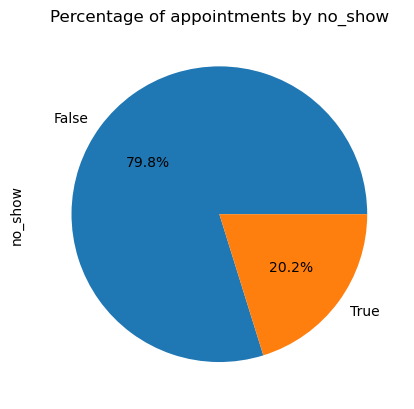

In [26]:
df_plot(df, 'no_show')

**The pie chart above shows that out of the total 110327 appointments recorded, 20.2% were missed**

In [27]:
#Number of no-show appointments 
no_show_counts = df.groupby('no_show')['no_show'].count()
no_show_counts

no_show
False    88049
True     22278
Name: no_show, dtype: int64

### 2. Distribution of age

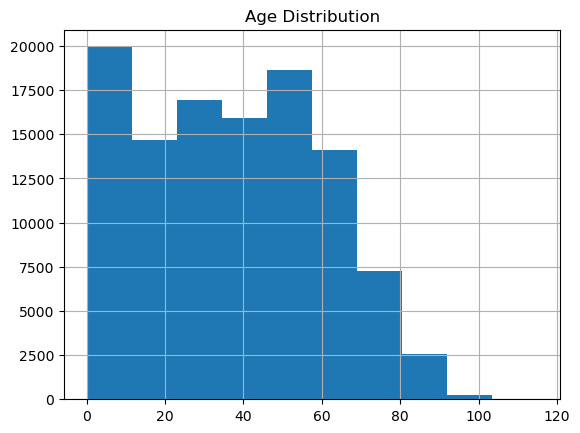

In [28]:
df['age'].hist()
plt.title('Age Distribution');

In [29]:
bins = [0,20,40,60,80,100,120]
labels = ['0-20','21-40','41-60','61-80','81-100','>100']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_range
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False,61-80
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,False,41-60
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,False,61-80
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False,0-20
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,False,41-60


In [30]:
df.groupby('age_range')['age_range'].count() #Categorizing the ages

age_range
0-20      28258
21-40     28798
41-60     30041
61-80     16877
81-100     2807
>100          7
Name: age_range, dtype: int64

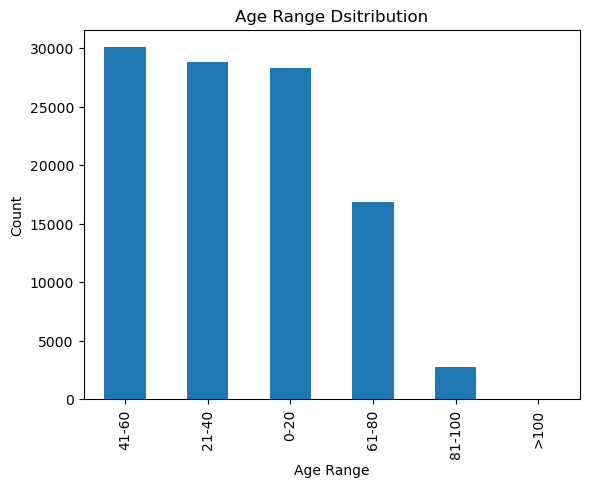

In [31]:
df['age_range'].value_counts().plot(kind='bar', title = 'Age Range Dsitribution') #Graph of age categories
plt.xlabel('Age Range')
plt.ylabel('Count');

**Patients between the ages of 41 and 60 booked the highest number of appointments while patients above the age of 100 booked the least number of appointments.**

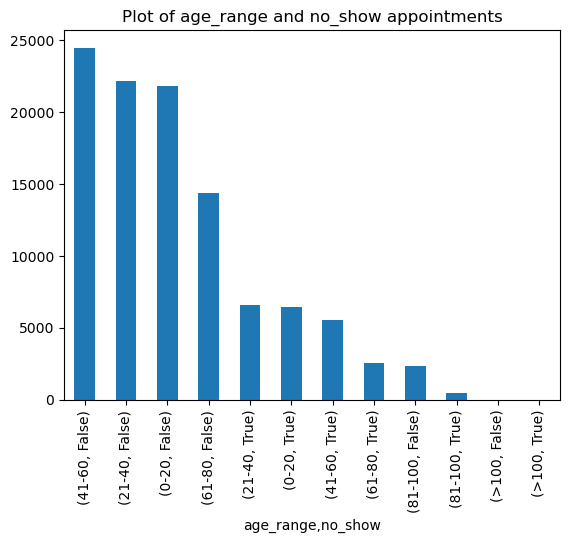

In [32]:
df_bar(df, 'age_range', 'no_show')

**Patients between the ages of 21-40 missed the most number of appointments and they are closely followed by patients in the age range of 0-20. Though most patients are in the age range of 41-60, the chart shows that they have the 3rd highest number of missed appointments.**

### 3. Gender distribution

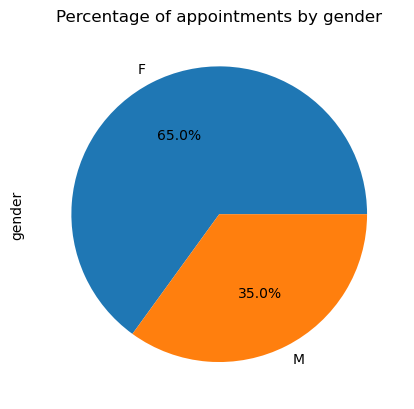

In [33]:
df_plot(df, 'gender')

**65% of the appointments were booked by females while 35% were booked by males.**

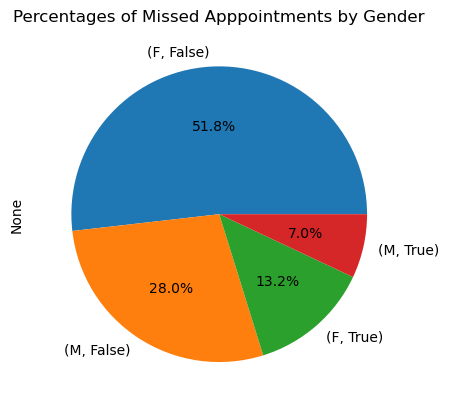

In [34]:
df[['gender','no_show']].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Percentages of Missed Apppointments by Gender');

**7% of 35% of appointments booked by males were missed while 13.2% of 65% of appointments booked by females were missed.**

**Calculation of mean of missed appointments by gender.**

In [35]:
gender_sum = df['gender'].value_counts()
gender_sum

F    71730
M    38597
Name: gender, dtype: int64

In [36]:
noshow_by_gender = df[['gender','no_show']].value_counts()
noshow_by_gender

gender  no_show
F       False      57162
M       False      30887
F       True       14568
M       True        7710
dtype: int64

In [37]:
no_show_mean_female = noshow_by_gender['F']/gender_sum['F']
no_show_mean_female

no_show
False    0.796905
True     0.203095
dtype: float64

In [38]:
no_show_mean_male = noshow_by_gender['M']/gender_sum['M']
no_show_mean_male

no_show
False    0.800244
True     0.199756
dtype: float64

**Calculation the mean of no shows by each gender shows that there is only a 0.003 difference between the rate females and males miss their appointments.**

### 4. Scheduled and appointment days

In [39]:
#Convert scheduled day to date and time
df['sch_date'] = df['scheduledday'].dt.date
df['sch_time'] = df['scheduledday'].dt.time

In [40]:
#Change datatype to datetime
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['sch_date'] = pd.to_datetime(df['sch_date'])

In [41]:
df['sch_date'].min() #Scheduling start date

Timestamp('2015-11-10 00:00:00')

In [42]:
df['sch_date'].max() #Scheduling end date

Timestamp('2016-06-08 00:00:00')

In [43]:
df['appointmentday'].min() #Appointment start date

Timestamp('2016-04-29 00:00:00')

In [44]:
df['appointmentday'].max() #Appointment end date

Timestamp('2016-06-08 00:00:00')

In [45]:
#Number of days between scheduled date and appointment date
df['days'] = df['appointmentday']-df['sch_date']

In [46]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_range,sch_date,sch_time,days
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False,61-80,2016-04-29,18:38:08,0 days
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,False,41-60,2016-04-29,16:08:27,0 days
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,False,61-80,2016-04-29,16:19:04,0 days
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False,0-20,2016-04-29,17:29:31,0 days
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,False,41-60,2016-04-29,16:07:23,0 days


In [47]:
df['days'].describe()

count                        110327
mean     10 days 04:29:14.333934576
std      15 days 06:11:17.038357920
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: days, dtype: object

**The average waiting period between schedule and appointment dates is 10 days. 25% and 50% of the appointments had a waiting period of 0 and 4 days, respectively, while 75% of the patients waited for 15 days, that is, 25% of the appointments has a waiting period of above 15 days with a maximum waiting period of 179 days. However, the minimum period is -6 days. This figure is explored further in the following sections.**

In [48]:
df_negative = df[df['days']< '0 days +00:00:00']
df_negative

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_range,sch_date,sch_time,days
27033,7839272661752,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09,38,RESISTÊNCIA,False,False,False,False,True,False,True,21-40,2016-05-10,10:51:53,-1 days
55226,7896293967868,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17,19,SANTO ANTÔNIO,False,False,False,False,True,False,True,0-20,2016-05-18,14:50:41,-1 days
64175,24252258389979,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04,22,CONSOLAÇÃO,False,False,False,False,False,False,True,21-40,2016-05-05,13:43:58,-1 days
71533,998231581612122,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05,81,SANTO ANTÔNIO,False,False,False,False,False,False,True,81-100,2016-05-11,13:49:20,-6 days
72362,3787481966821,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03,7,TABUAZEIRO,False,False,False,False,False,False,True,0-20,2016-05-04,06:50:57,-1 days


**While checking for the number of days between appointment date and schedule dates, it was found out that 5 patients has appointment dates fixed before the date it was scheduled. Therefore, these patients missed their appointments as well.**

In [49]:
df['days'] = df['days'].dt.days #Extract integer from days 

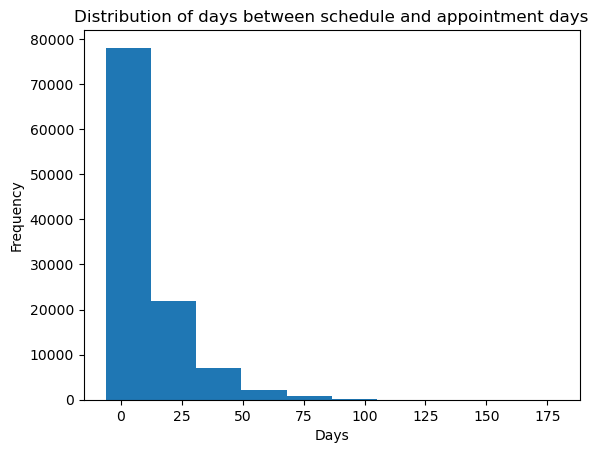

In [50]:
df['days'].plot(kind = 'hist', title = 'Distribution of days between schedule and appointment days')
plt.xlabel('Days'); #Plot of distribution of days between schedule and appointment days

In [51]:
days2 = len(df.query('days > 0')) #Number of appointments with different schedule and appointment dates
days2

71837

In [52]:
days2_no_show = len(df.query('days > 0 and no_show == True')) 
days2_no_show #Number of appointments with different schedule and appointment dates and also missed appointment

20485

In [53]:
days2_no_show/days2*100 

28.515945821791

**28.5% of patients that did not have the same schedule and appointment date did not show up for their appointments.**

In [54]:
#Extract year, month and day of week
df['sch_year'] = df['sch_date'].dt.year
df['sch_month'] = df['sch_date'].dt.month
df['sch_dayofweek'] = df['sch_date'].dt.dayofweek
df['appointment_month'] = df['appointmentday'].dt.month
df['appointment_dayofweek'] = df['appointmentday'].dt.dayofweek

In [55]:
df.groupby('sch_month').size() #Schedule months

sch_month
1        60
2       280
3      3608
4     25299
5     67295
6     13723
11        1
12       61
dtype: int64

In [56]:
df.groupby('appointment_month').size() #Appointment months

appointment_month
4     3227
5    80694
6    26406
dtype: int64

**Appointments scheduled at January - June, November and December were booked to three months in 2016 (April, May and June).**

In [57]:
df.groupby('sch_dayofweek').size() #Schedule day of week (Monday - 0, Saturday - 5)

sch_dayofweek
0    23044
1    26111
2    24223
3    18044
4    18881
5       24
dtype: int64

In [58]:
df.groupby('appointment_dayofweek').size() #Appointment day of week (Monday - 0, Saturday - 5)

appointment_dayofweek
0    22678
1    25584
2    25824
3    17217
4    18985
5       39
dtype: int64

**Apointment were mostly booked to Tuesdays, Wednesdays, and Mondays, and were least booked to Saturdays. There were no appointments scheduled on or booked to Sundays.**

In [59]:
df.groupby(['no_show','appointment_dayofweek']).size() #No show appointments and day of week (Monday - 0, Saturday - 5)

no_show  appointment_dayofweek
False    0                        17997
         1                        20448
         2                        20740
         3                        13882
         4                        14952
         5                           30
True     0                         4681
         1                         5136
         2                         5084
         3                         3335
         4                         4033
         5                            9
dtype: int64

**The table above shows that appointments were missed in descending order of Tuesdays, Wednesdays, Mondays, Fridays, Thursdays and Saturdays.**

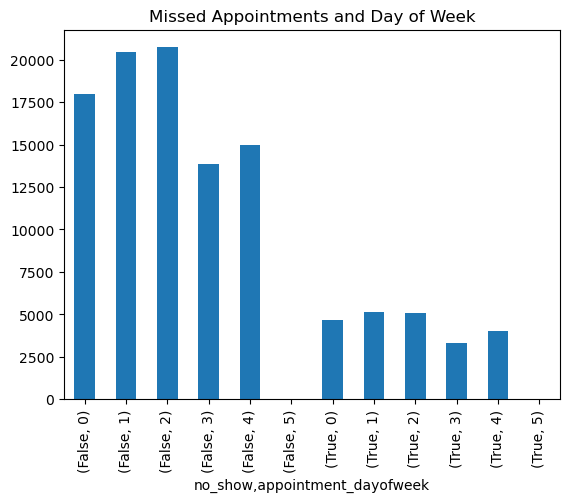

In [60]:
df.groupby(['no_show','appointment_dayofweek']).size().plot(kind='bar', title='Missed Appointments and Day of Week'); #Monday - 0, Saturday - 5

In [61]:
df['appointmentday'].nunique() #Total numbers of appointment days 

27

In [62]:
df.groupby(['appointmentday','no_show'])['no_show'].size() #Appointment dates and no shows

appointmentday  no_show
2016-04-29      False      2594
                True        633
2016-05-02      False      3511
                True        859
2016-05-03      False      3418
                True        828
2016-05-04      False      3189
                True        972
2016-05-05      False      3458
                True        806
2016-05-06      False      3076
                True        795
2016-05-09      False      3494
                True       1015
2016-05-10      False      3311
                True        990
2016-05-11      False      3582
                True        883
2016-05-12      False      3554
                True        837
2016-05-13      False      3074
                True        903
2016-05-14      False        30
                True          9
2016-05-16      False      3559
                True       1047
2016-05-17      False      3429
                True        932
2016-05-18      False      3478
                True        887
2016-05-19      

In [63]:
df['appointmentday'] = df['appointmentday'].dt.date

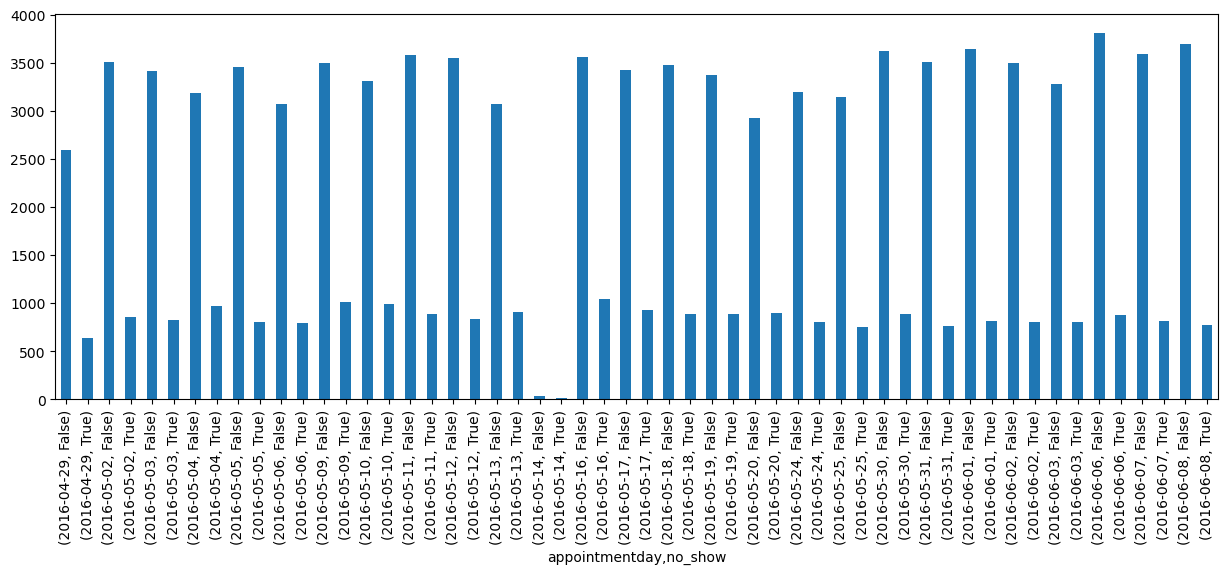

In [64]:
df.groupby(['appointmentday','no_show'])['no_show'].size().plot(kind='bar',figsize = (15,5));

### 5. SMS Received

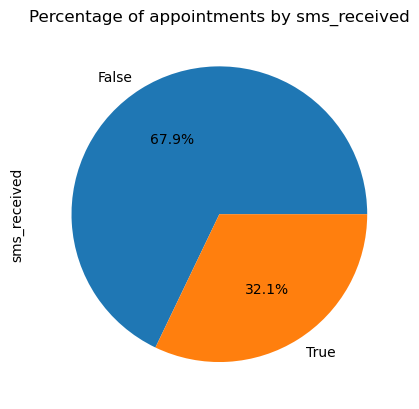

In [65]:
df_plot(df, 'sms_received')

**32.1% of the patients received SMS notifications while 67.9% did not receive an SMS notification.**

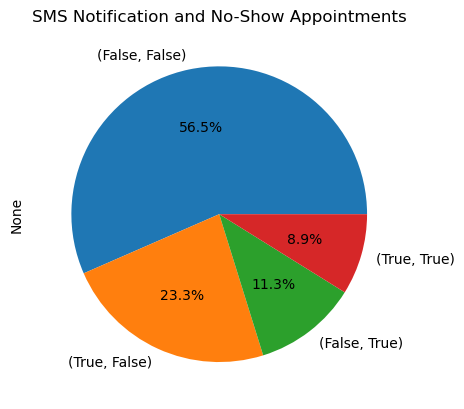

In [66]:
#SMS notifications and no shows
df[['sms_received','no_show']].value_counts().plot(kind='pie', autopct='%1.1f%%', title = 'SMS Notification and No-Show Appointments');

**8.9% of patients that received SMS notifications missed their appointments while 56.5% of patients who did not receive SMS notifications did not miss their appointments.**

### 6. Hypertension

In [67]:
df.groupby(['hypertension','no_show'])['no_show'].count()

hypertension  no_show
False         False      70081
              True       18530
True          False      17968
              True        3748
Name: no_show, dtype: int64

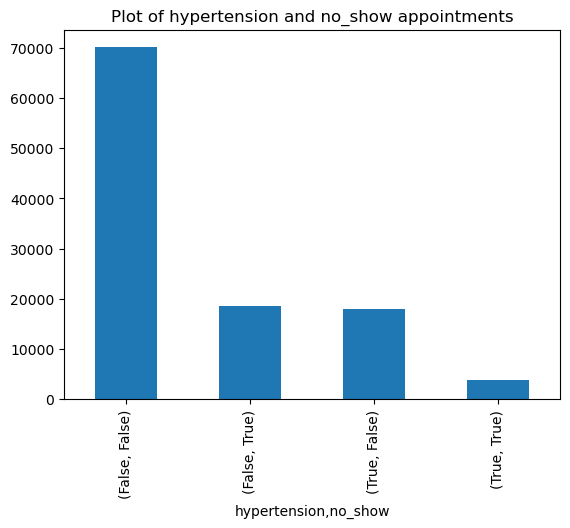

In [68]:
df_bar(df, 'hypertension', 'no_show')

**Most patients that showed up for appointments were not hypertensive. Although a small value, 3748 appointments were missed by hypertensive patients.**

### 7. Diabetes

In [69]:
df.groupby(['diabetes','no_show'])['no_show'].count()

diabetes  no_show
False     False      81571
          True       20856
True      False       6478
          True        1422
Name: no_show, dtype: int64

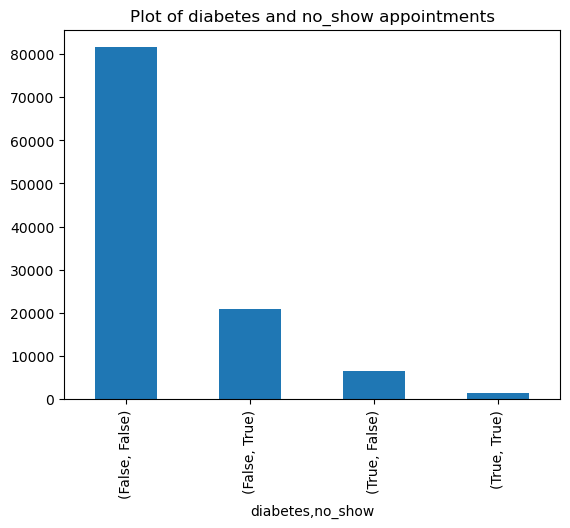

In [70]:
df_bar(df, 'diabetes', 'no_show')

**Most patients who did not miss appointments were also not diabetic, while only 1422 appointments were missed by diabetic patients.**

### 8. Alcoholism

In [71]:
df.groupby(['alcoholism','no_show'])['no_show'].count()

alcoholism  no_show
False       False      85372
            True       21603
True        False       2677
            True         675
Name: no_show, dtype: int64

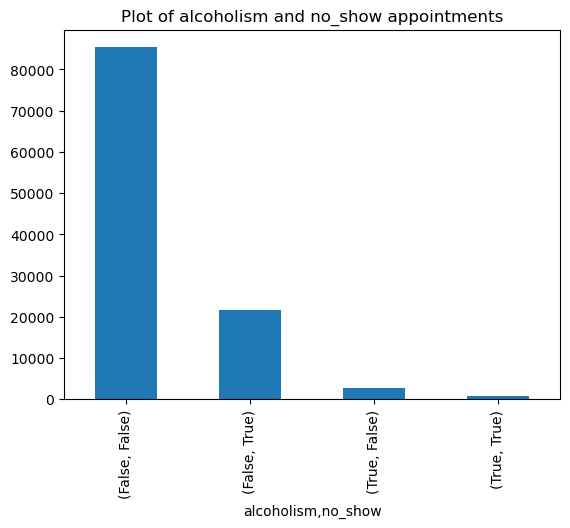

In [72]:
df_bar(df, 'alcoholism', 'no_show')

**Most patients who did not miss appointments were also not alcoholics, while only 675 appointments were missed by alcoholic patients.**

### 9. Handicaps

In [73]:
df.groupby(['handicap','no_show'])['no_show'].count()

handicap  no_show
False     False      86373
          True       21912
True      False       1676
          True         366
Name: no_show, dtype: int64

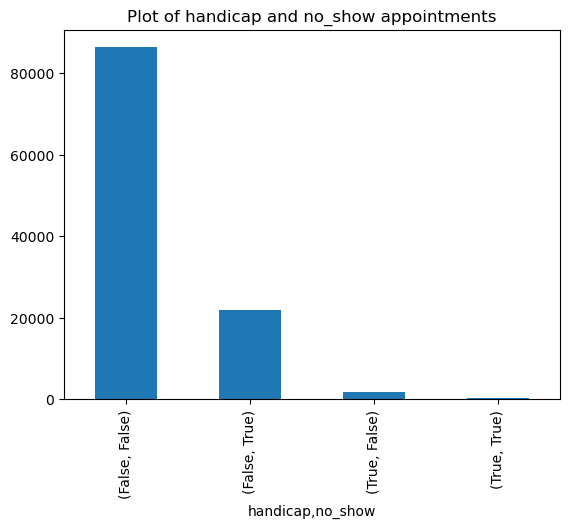

In [74]:
df_bar(df, 'handicap', 'no_show')

**Most patients who did not miss appointments were not handicapped while 366 appointments booked by handicapped patients were missed.**

### 9. Scholarship

In [75]:
df.groupby(['scholarship','no_show'])['no_show'].count()

scholarship  no_show
False        False      79783
             True       19701
True         False       8266
             True        2577
Name: no_show, dtype: int64

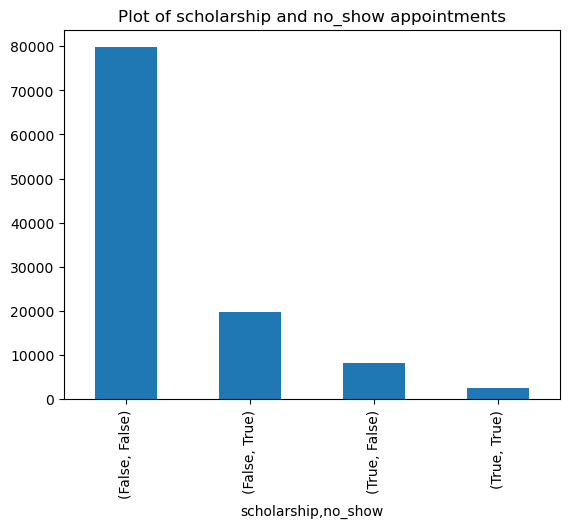

In [76]:
df_bar(df, 'scholarship', 'no_show')

**Most appointments that were not missed were booked by patients who are not enrolled in Brasilian welfare program 'Bolsa Família' while 2577 appointments booked by beneficiaries of the welfare program were missed.**

### 10. Combining factors 

In [77]:
len1 = len(df.query('hypertension == True and diabetes == True and handicap == True'))
len1

316

In [78]:
len2 = len(df.query('hypertension == True and diabetes == True and handicap == True and no_show == True'))
len2

47

In [79]:
len2/len1*100

14.873417721518987

In [80]:
len3 = len(df.query('scholarship == True and sms_received == True'))
len3

3501

In [81]:
len4 = len(df.query('scholarship == True and sms_received == True and no_show == True'))
len4

1184

In [82]:
len4/len3*100

33.818908883176235

**The above calculations show that 15% of patients that are hypertensive, diabetic and handicapped are likely to miss appointments while 34% of patients that receives both scholarships and sms notifications are likely to miss appointments.**

### Correlations

In [83]:
df[['age','scholarship','hypertension','diabetes','alcoholism','handicap','sms_received','no_show','days']].corr()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days
age,1.000000,-0.092119,0.503676,0.291760,0.095686,0.081951,0.012774,-0.060794,0.034924
scholarship,-0.092119,1.000000,-0.019241,-0.024612,0.035224,-0.009192,0.001202,0.029391,-0.030516
hypertension,0.503676,-0.019241,1.000000,0.432264,0.088087,0.081366,-0.006238,-0.036176,-0.017193
diabetes,0.291760,-0.024612,0.432264,1.000000,0.018634,0.054716,-0.014782,-0.015169,-0.027160
alcoholism,0.095686,0.035224,0.088087,0.018634,1.000000,0.003118,-0.026080,-0.000245,-0.038649
handicap,0.081951,-0.009192,0.081366,0.054716,0.003118,1.000000,-0.024031,-0.007762,-0.020441
sms_received,0.012774,0.001202,-0.006238,-0.014782,-0.026080,-0.024031,1.000000,0.126678,0.398502
no_show,-0.060794,0.029391,-0.036176,-0.015169,-0.000245,-0.007762,0.126678,1.000000,0.186062
days,0.034924,-0.030516,-0.017193,-0.027160,-0.038649,-0.020441,0.398502,0.186062,1.000000


In [84]:
df2 = df[df['days'] > 0] #Patients that have differences between schedule date and appointment date
df2.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,...,no_show,age_range,sch_date,sch_time,days,sch_year,sch_month,sch_dayofweek,appointment_month,appointment_dayofweek
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29,76,REPÚBLICA,False,True,False,...,False,61-80,2016-04-27,08:36:51,2,2016,4,2,4,4
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29,23,GOIABEIRAS,False,False,False,...,True,21-40,2016-04-27,15:05:12,2,2016,4,2,4,4
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29,39,GOIABEIRAS,False,False,False,...,True,21-40,2016-04-27,15:39:58,2,2016,4,2,4,4
9,78124564369297,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29,19,CONQUISTA,False,False,False,...,False,0-20,2016-04-27,12:48:25,2,2016,4,2,4,4
10,734536231958495,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29,30,NOVA PALESTINA,False,False,False,...,False,21-40,2016-04-27,14:58:11,2,2016,4,2,4,4


In [85]:
df2[['age','scholarship','hypertension','diabetes','alcoholism','handicap','sms_received','no_show','days']].corr()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days
age,1.000000,-0.102835,0.500018,0.284050,0.079987,0.083014,-0.042486,-0.101549,-0.008582
scholarship,-0.102835,1.000000,-0.027328,-0.025247,0.030770,-0.009014,0.020525,0.045881,-0.026455
hypertension,0.500018,-0.027328,1.000000,0.424797,0.085947,0.086346,-0.037060,-0.057367,-0.051113
diabetes,0.284050,-0.025247,0.424797,1.000000,0.024290,0.058614,-0.031504,-0.022438,-0.048162
alcoholism,0.079987,0.030770,0.085947,0.024290,1.000000,0.009095,-0.008744,0.019929,-0.029123
handicap,0.083014,-0.009014,0.086346,0.058614,0.009095,1.000000,-0.020882,-0.009904,-0.015725
sms_received,-0.042486,0.020525,-0.037060,-0.031504,-0.008744,-0.020882,1.000000,-0.020328,0.202220
no_show,-0.101549,0.045881,-0.057367,-0.022438,0.019929,-0.009904,-0.020328,1.000000,0.060173
days,-0.008582,-0.026455,-0.051113,-0.048162,-0.029123,-0.015725,0.202220,0.060173,1.000000


## Conclusion

After data cleaning, 110327 of 110527 rows were left. Of this, 20.2% (22278) of appointments were missed. Analysis of the data revealed that most appointments were scheduled by patients between the ages of 41-60 and 21-40 while patients above the age of 81 were the least. However, patients between 21-40 and 0-20 missed their appointments mostly. This can be assumed to be caused by factors such as work schedules and need for guardian for those between 0-20.

In terms of gender, more females booked appointments thus they also missed more appointments. However, by comparing the mean, it shows that both gender did not show up for appointments at the same rate.

Analysis of the schedule and appointments dates revealed that for this dataset, scheduling started from '2015-11-10' and ended '2016-06-08' while appointments began '2016-04-29' and ended '2016-06-08'. Therefore, some patients had no difference between schedule and appointment dates (35%) and they were very less likely to miss appointments, while 28.5% of patients who had to wait missed their appointments. The average days for waiting is 10 days with a maximum of 179 days. Through analysis, I also found out that five(5) patients made errors while choosing appointments dates by choosing dates before the schedule dates. As a result, these patients had 'no shows'. 

Patients that were not hypertensive or diabetic or handicapped or alcoholic mostly showed up for appointments. Also, patients that did not get SMS notifications or scholarship mostly showed up for appointments. While factors such as SMS and scholarships are supposed to make patients show up for appointments, 34% of patients who got the two missed their appointments. Only 14% of patients that were hypertensive, diabetic and handicapped missed their appointments. 

However, there is a weakly negative correlation between no show and hypertension, no show and diabetes, no show and handicap, and no show and alcoholic while there is a weakly positive correlation between no show and scholarship, and no show and sms received.

Limitation of this analysis include that the individual characteristics of the patients were not studied. For example, if a patients missed more appointments because they had more appointments scheduled for the same day. One other limitation is that the data only included appointments dates for 27 days while they were scheduled for 8 months. 

## References

Link to dataset: [Kaggle](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&ust=1532469042118000)